# Prediction of back pain using Logistic Regression, Python

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm   
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
  

In [3]:
backpain_df = pd.read_csv('Dataset_spine.csv')

In [4]:
backpain_df.columns


Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [5]:

#backpain_df.info()
 
backpain_df['Unnamed: 13'].unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

In [7]:
#Here the columns are not named,so now we name the columns.
#Also Unnamed column is not of any significance so we drop it

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )

In [8]:
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [22]:
backpain_df.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


<AxesSubplot:>

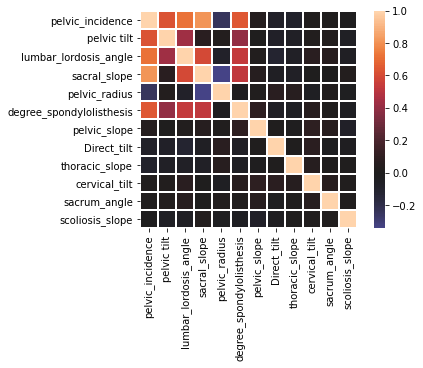

In [7]:
sns.heatmap(backpain_df.corr(), annot = False, center = 0, square = True, lw=1, fmt = '.2f')

In [8]:
backpain_df.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [ ]:
 # we look for Balanced columns bcoz they result in better prediction
#balanced: normal-40,50,30 abnormal = 60,50,70
#imbalanced : normal =95%,90 abnormal =5%, 10% (extreme majority and extreme minority)
#imbalanced datasets are handeled differently

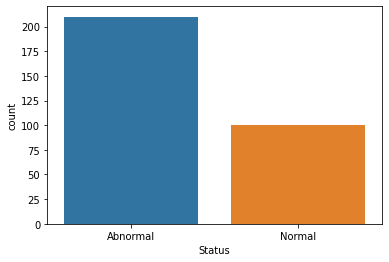

In [116]:
sns.countplot(x = 'Status', data = backpain_df)
plt.show()

In [9]:
columns=backpain_df.columns
for i in columns:
    print(i,'has : ',backpain_df[i].nunique(),'Unique Values')

pelvic_incidence has :  310 Unique Values
pelvic tilt has :  310 Unique Values
lumbar_lordosis_angle has :  280 Unique Values
sacral_slope has :  281 Unique Values
pelvic_radius has :  310 Unique Values
degree_spondylolisthesis has :  310 Unique Values
pelvic_slope has :  310 Unique Values
Direct_tilt has :  310 Unique Values
thoracic_slope has :  310 Unique Values
cervical_tilt has :  310 Unique Values
sacrum_angle has :  310 Unique Values
scoliosis_slope has :  310 Unique Values
Status has :  2 Unique Values


In [9]:
print(backpain_df.Status.value_counts())
print(backpain_df.Status.describe())

Abnormal    210
Normal      100
Name: Status, dtype: int64
count          310
unique           2
top       Abnormal
freq           210
Name: Status, dtype: object


### Trying to understand the significance of independent featues through EDA

In [10]:
backpain_df.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


backpain_df.groupby('Status').median()

### if we look at the the  mean and median column

* only first 6 variables has significant difference(between normal and abnormal)
* the last 6 variables are almost same. So they are not statistiscally significant(we can ignore them)
* lets see our instinct is right after buiolding model
* The following box plot also shows the same

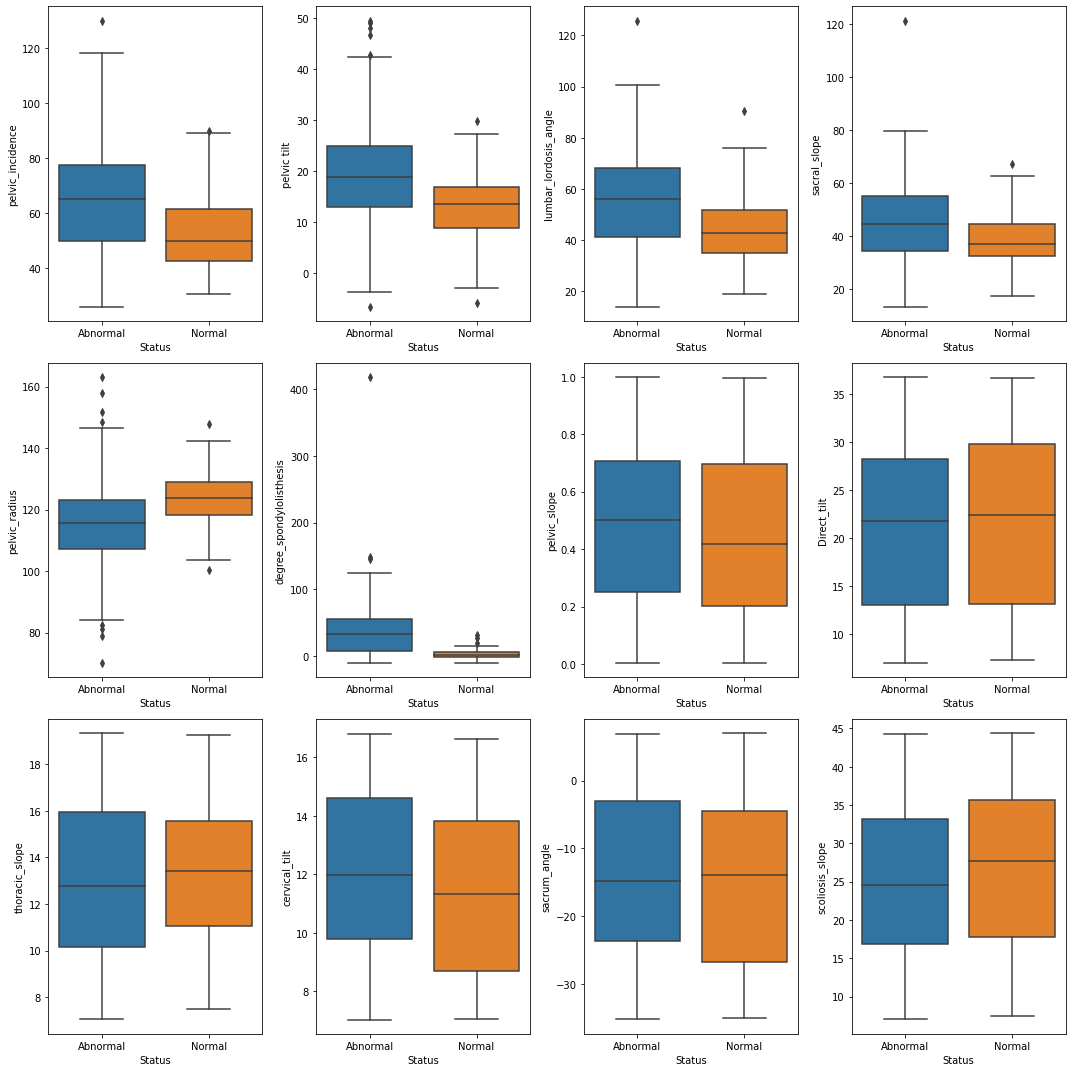

In [39]:
fig, axes = plt.subplots(3,4,figsize=(15,15))
axes = axes.flatten()

for i in range(0,len(backpain_df.columns)-1):
    sns.boxplot(x='Status',y=backpain_df.iloc[:,i], data=backpain_df,orient='v', ax=axes[i])
    
plt.tight_layout()
plt.show()

## checking for linear seperability

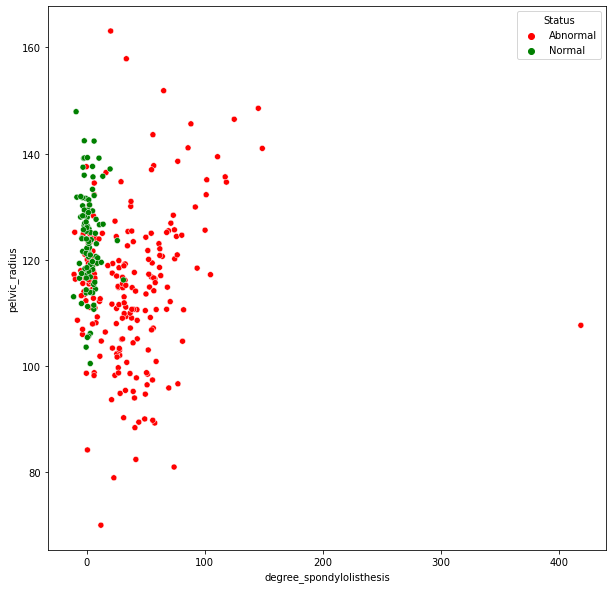

In [44]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='degree_spondylolisthesis', y="pelvic_radius", hue= "Status", data=backpain_df, palette=['red','green'])
plt.show()

# u cannot draw a linear line that seperates

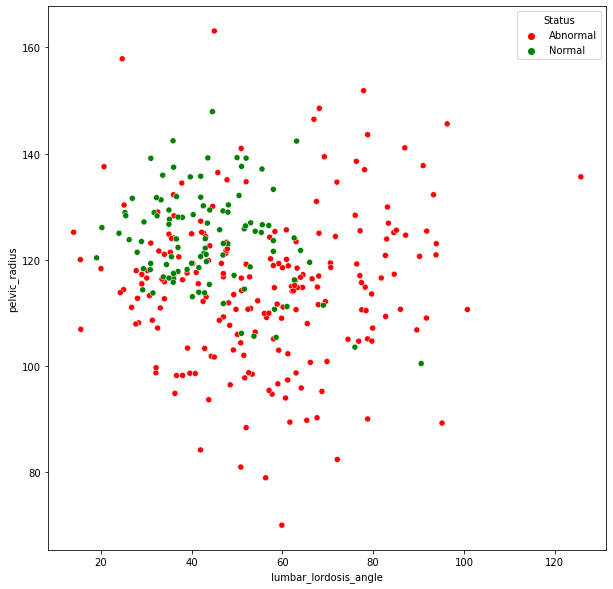

In [12]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='lumbar_lordosis_angle', y="pelvic_radius", hue= "Status", data=backpain_df, palette=['red','green'])
plt.show()

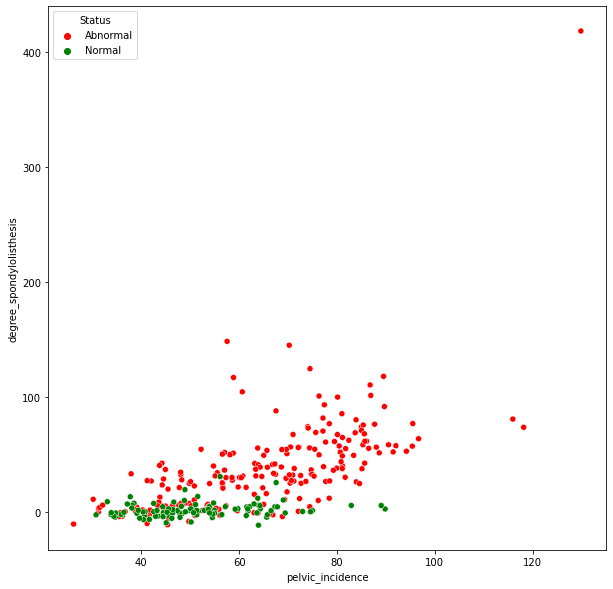

In [47]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(y='degree_spondylolisthesis', x="pelvic_incidence", hue= "Status", data=backpain_df, palette=['red','green'])
plt.show()
# these variables gives a sloighyt linear separable line

In [117]:
backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

In [120]:
X= backpain_df.loc[:,backpain_df.columns != 'Status']
y= backpain_df.loc[:,backpain_df.columns == 'Status']
X.columns,y.columns


(Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
        'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
        'sacrum_angle', 'scoliosis_slope'],
       dtype='object'),
 Index(['Status'], dtype='object'))

# Standardscaling the features 

* The mean of the training samples is zero if with_mean=False
* s is the standard deviation of the training samples or one if with_std=False.
* fit(X[, y]) -- Compute the minimum and maximum to be used for later scaling.

* fit_transform(X[, y]) -- Fit to data, then transform it.

* transform(X) -- Scale features of X according to feature_range.


In [121]:
from sklearn.preprocessing import StandardScaler
def data_preprocess(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
    scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
    scaler.fit(X_train)
#now apply the transformation to the data
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train= y_train.astype('int')
    y_test= y_test.astype('int')
    return( train_scaled,test_scaled,y_train,y_test)

In [122]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return(logreg)

In [123]:
# let us assign the output of data_preprocess() to train and ytest variablkles:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [124]:
logreg_result = logistic_regression(X_train_scaled,y_train)

In [125]:
print('Train set score: {:.3f}'.format(logreg_result.score(X_train_scaled,y_train)))
print('Test set score: {:.3f}'.format(logreg_result.score(X_test_scaled,y_test)))

print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)


Train set score: 0.876
Test set score: 0.817
(217, 12) (217,)
(93, 12) (93,)


In [126]:
# while the previous  model implemented was good in predicting the target variable, we did not interpret about independent features, i.e wh
#which variable influences the target varaiable more

logit_model = sm.Logit(y_train, X_train_scaled)
result=logit_model.fit()
print(result.summary2())



         Current function value: 0.473055
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   y                 AIC:               229.3058  
Date:                 2021-01-12 18:18  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 12379592.3297  0.0000 1.0000 -24263555.0282 24263555.1909
x2   0.0765  7056301.6353  0.0000 1.0000 -13830096.9

C:\Users\Smart Hari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## NOTE:
* above command gives us two warnings, even though our perediction was good 
1. no of iterations exceeded.
2. no convergence
* This can be due to multi collinearity and high std.error in coefficients.

* In linear regresion, we consider the correlation of feature with target to remove multi collinearity since y is continuous(prediction). but in logistic y(target var) is  classification. so we dont have to consider the correlation wiyth it. just remove variables that have high corr coeff.




## Understanding the model result summary
* The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular.
* In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
* Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model.



In [127]:
#Removing the highly correlated variables which also had high standard error

cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic tilt','sacral_slope']]
X = backpain_df[cols_to_include]

In [128]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.839
Test set score: 0.785


* The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [29]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.485977
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.227     
Dependent Variable: y                AIC:              228.9138  
Date:               2021-01-12 13:07 BIC:              259.3329  
No. Observations:   217              Log-Likelihood:   -105.46   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      1.8984e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4330      0.2579    -1.6785    0.0933    -0.9385     0.0726
x2    -1.0038      0.2160    -4.6477    0.0000    -1.4

### choosing features at 95% cofidence interval

In [129]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = backpain_df.loc[:,['pelvic_radius','degree_spondylolisthesis']]

In [131]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))


logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Training set score: 0.816
Test set score: 0.785
Optimization terminated successfully.
         Current function value: 0.507309
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.193     
Dependent Variable: y                AIC:              224.1719  
Date:               2021-01-12 18:26 BIC:              230.9317  
No. Observations:   217              Log-Likelihood:   -110.09   
Df Model:           1                LL-Null:          -136.45   
Df Residuals:       215              LLR p-value:      3.8328e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.8753      0.2004    -4.3680    0.0000    -1.2681    -0.4826
x2    

In [132]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.507309
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.193     
Dependent Variable: y                AIC:              224.1719  
Date:               2021-01-12 18:27 BIC:              230.9317  
No. Observations:   217              Log-Likelihood:   -110.09   
Df Model:           1                LL-Null:          -136.45   
Df Residuals:       215              LLR p-value:      3.8328e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.8753      0.2004    -4.3680    0.0000    -1.2681    -0.4826
x2     1.6628      0.2513     6.6168    0.0000     1.1

* so the convergence is optimized in the above  and the iterationns also didnt exceed

In [133]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

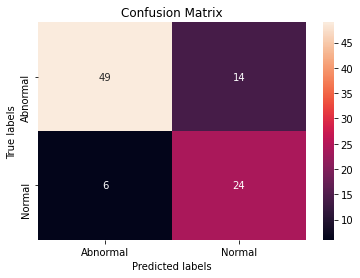

In [135]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

In [33]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Abnormal       0.62      0.83      0.71        30
      Normal       0.91      0.76      0.83        63

    accuracy                           0.78        93
   macro avg       0.77      0.80      0.77        93
weighted avg       0.82      0.78      0.79        93



## implementing ROC  curve:

In [ ]:
y_pred 

In [ ]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_train = logreg_result.predict(X_train_scaled)
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train,  y_pred_train)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_train = logreg_result.predict_proba(X_train_scaled)

# Building more models with different cases:

In [ ]:
# Here the target metric is recall and it is 0.8.  at 95% confidence u can improve it by checkimg with following cases
# Scaling - Without scaling , Min max scaling
# Dont remove all three correlated columns just the two or the one that solves the problem(ex: add Sacral Slope coljumn and see)
#reduce confidence interval to 90% 
# Implement code for drawing the ROC curve 

In [141]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']


# 1. min max scaling

In [142]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']




def data_preprocess(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    print(scaler.fit(X_train))
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')






In [143]:

def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

logreg_result = logistic_regression(X_train_scaled, y_train)


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)



print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



MinMaxScaler()
(217, 12) (217,)
(93, 12) (93,)
Training set score: 0.765
Test set score: 0.731


In [ ]:
#though we obtained a good f1 score, we can notice a little overfitting.lets check if we can build a better model 

## 1a. minmaxscale with all the columns

In [144]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249223
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.604     
Dependent Variable: y                AIC:              132.1630  
Date:               2021-01-12 18:39 BIC:              172.7217  
No. Observations:   217              Log-Likelihood:   -54.081   
Df Model:           11               LL-Null:          -136.45   
Df Residuals:       205              LLR p-value:      1.4262e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -21.0871    10.0725   -2.0935   0.0363   -40.8287    -1.3454
x2      15.2298     4.6724    3.2596   0.0011     6.0722 

### considering varaibles whose p_value < 0.05

In [145]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = backpain_df.loc[:,['pelvic_incidence','pelvic tilt','pelvic_radius','degree_spondylolisthesis']]


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.742
Test set score: 0.753
Optimization terminated successfully.
         Current function value: 0.268989
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.572     
Dependent Variable: y                AIC:              124.7413  
Date:               2021-01-12 18:44 BIC:              138.2609  
No. Observations:   217              Log-Likelihood:   -58.371   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      1.2368e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -11.7024     2.8543   -4.0999   0.0000   -17.2967    -6

In [ ]:
the above model with  scaled features gives us better accuracy score and there is np overfitting and underfitting issues.

C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


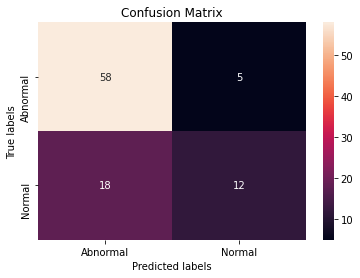

              precision    recall  f1-score   support

    Abnormal       0.71      0.40      0.51        30
      Normal       0.76      0.92      0.83        63

    accuracy                           0.75        93
   macro avg       0.73      0.66      0.67        93
weighted avg       0.74      0.75      0.73        93



In [146]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

# Gauging model accuracy 

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

#Plotting confusion matrix table
print(classification_report(y_test, y_pred, target_names=labels))


### 1b. minmaxscale without  3 columns  that cause multicollinearity

In [149]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']




def data_preprocess(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    print(scaler.fit(X_train))
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)






def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

logreg_result = logistic_regression(X_train_scaled, y_train)


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)



print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))




MinMaxScaler()
(217, 12) (217,)
(93, 12) (93,)
Training set score: 0.765
Test set score: 0.731


In [150]:
#removing 3 columns  that cause multicollinearity
cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic tilt','sacral_slope']]
X = backpain_df[cols_to_include]

X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.751
Test set score: 0.677
Optimization terminated successfully.
         Current function value: 0.312515
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.503     
Dependent Variable: y                AIC:              153.6316  
Date:               2021-01-12 18:55 BIC:              184.0507  
No. Observations:   217              Log-Likelihood:   -67.816   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.7773e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -2.4847      1.7082    -1.4546    0.1458    -5.8327  

In [152]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = backpain_df.loc[:,['pelvic_radius','degree_spondylolisthesis','cervical_tilt']]


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.677
Test set score: 0.710
Optimization terminated successfully.
         Current function value: 0.325780
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.482     
Dependent Variable: y                AIC:              147.3884  
Date:               2021-01-12 19:04 BIC:              157.5281  
No. Observations:   217              Log-Likelihood:   -70.694   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      2.7724e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -5.8033      1.0919    -5.3148    0.0000    -7.9434  

C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


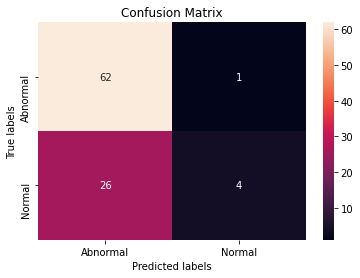

              precision    recall  f1-score   support

    Abnormal       0.80      0.13      0.23        30
      Normal       0.70      0.98      0.82        63

    accuracy                           0.71        93
   macro avg       0.75      0.56      0.52        93
weighted avg       0.74      0.71      0.63        93



In [153]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

# Gauging model accuracy 

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

#Plotting confusion matrix table
print(classification_report(y_test, y_pred, target_names=labels))


##### in this model recall score for abnormal is 0.13 . it is worse than previous model so we will not use it

## 1c. minmaxscale without  'lumbar_lordosis_angle'

In [161]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']




def data_preprocess(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    print(scaler.fit(X_train))
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)






def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

logreg_result = logistic_regression(X_train_scaled, y_train)


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)



print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))




MinMaxScaler()
(217, 12) (217,)
(93, 12) (93,)
Training set score: 0.765
Test set score: 0.731


In [162]:
#removing 3 columns  that cause multicollinearity
cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle']]
X = backpain_df[cols_to_include]

X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.774
Test set score: 0.720
Optimization terminated successfully.
         Current function value: 0.254630
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.595     
Dependent Variable: y                AIC:              132.5096  
Date:               2021-01-12 19:48 BIC:              169.6885  
No. Observations:   217              Log-Likelihood:   -55.255   
Df Model:           10               LL-Null:          -136.45   
Df Residuals:       206              LLR p-value:      1.0403e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -22.9580     9.8132   -2.3395   0.0193   -42.1915    -3

In [157]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = backpain_df.loc[:,['pelvic_incidence','pelvic tilt','pelvic_radius','degree_spondylolisthesis']]


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.742
Test set score: 0.753
Optimization terminated successfully.
         Current function value: 0.268989
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.572     
Dependent Variable: y                AIC:              124.7413  
Date:               2021-01-12 19:14 BIC:              138.2609  
No. Observations:   217              Log-Likelihood:   -58.371   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      1.2368e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -11.7024     2.8543   -4.0999   0.0000   -17.2967    -6

(93,)
(93, 4)


C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


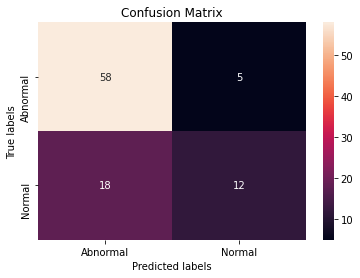

              precision    recall  f1-score   support

    Abnormal       0.71      0.40      0.51        30
      Normal       0.76      0.92      0.83        63

    accuracy                           0.75        93
   macro avg       0.73      0.66      0.67        93
weighted avg       0.74      0.75      0.73        93



In [158]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

print(y_pred.shape)
print(X_test_scaled.shape)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

# Gauging model accuracy 

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

#Plotting confusion matrix table
print(classification_report(y_test, y_pred, target_names=labels))


## 2.with NO scaling and All columns

In [159]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']


X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
y_train= y_train.astype('int')
y_test= y_test.astype('int')

def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)
logreg_result = logistic_regression(X_train, y_train)

#logreg_result =  LogisticRegression().fit(X_train, y_train)



print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



print("Training set score: {:.3f}".format(logreg_result.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test,y_test)))

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
   

(217, 12) (217,)
(93, 12) (93,)
Training set score: 0.871
Test set score: 0.796
         Current function value: 0.298731
         Iterations: 35
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.525     
Dependent Variable:     y                  AIC:                153.6491  
Date:                   2021-01-12 19:14   BIC:                194.2079  
No. Observations:       217                Log-Likelihood:     -64.825   
Df Model:               11                 LL-Null:            -136.45   
Df Residuals:           205                LLR p-value:        3.5513e-25
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------

C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Smart Hari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [167]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = backpain_df.loc[:,['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis','cervical_tilt']]


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))



logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

MinMaxScaler()
Training set score: 0.710
Test set score: 0.710
Optimization terminated successfully.
         Current function value: 0.310169
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.507     
Dependent Variable: y                AIC:              142.6136  
Date:               2021-01-12 19:58 BIC:              156.1331  
No. Observations:   217              Log-Likelihood:   -67.307   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      8.8541e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -4.9579      2.0300    -2.4423    0.0146    -8.9366  

#### above model has lack of  convergence and exceeded iterations hence we need to check for multicollinearity

In [168]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test)

print(y_pred.shape)
print(X_test.shape)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

# Gauging model accuracy 

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

#Plotting confusion matrix table
print(classification_report(y_test, y_pred, target_names=labels))


ValueError: X has 12 features per sample; expecting 4

In [108]:
backpain_df = pd.read_csv('Dataset_spine.csv')

backpain_df.drop(columns ='Unnamed: 13', axis = 1, inplace = True )
backpain_df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

backpain_df.loc[backpain_df.Status == 'Abnormal','Status'] = 1
backpain_df.loc[backpain_df.Status == 'Normal','Status'] =0

X = backpain_df.loc[:,backpain_df.columns != 'Status']
y = backpain_df.loc[:,backpain_df.columns == 'Status']

cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic tilt','sacral_slope']]
X = backpain_df[cols_to_include]

X_train,X_test,y_train,y_test = train_test_split(X, y.values.ravel(),test_size=0.3,random_state=0)
y_train= y_train.astype('int')
y_test= y_test.astype('int')

def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)
logreg_result = logistic_regression(X_train, y_train)

#logreg_result =  LogisticRegression().fit(X_train, y_train)



print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



print("Training set score: {:.3f}".format(logreg_result.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test,y_test)))

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
  

C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(217, 9) (217,)
(93, 9) (93,)
Training set score: 0.848
Test set score: 0.806
Optimization terminated successfully.
         Current function value: 0.339341
         Iterations 9
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.460     
Dependent Variable:    y                  AIC:                165.2740  
Date:                  2021-01-12 17:47   BIC:                195.6931  
No. Observations:      217                Log-Likelihood:     -73.637   
Df Model:              8                  LL-Null:            -136.45   
Df Residuals:          208                LLR p-value:        2.2792e-23
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        9.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------

(93,)
(93, 9)


C:\Users\Smart Hari\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


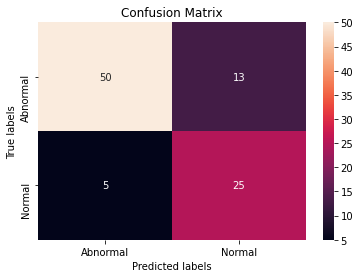

              precision    recall  f1-score   support

    Abnormal       0.66      0.83      0.74        30
      Normal       0.91      0.79      0.85        63

    accuracy                           0.81        93
   macro avg       0.78      0.81      0.79        93
weighted avg       0.83      0.81      0.81        93



In [109]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test)

print(y_pred.shape)
print(X_test.shape)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

# Gauging model accuracy 

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

#Plotting confusion matrix table
print(classification_report(y_test, y_pred, target_names=labels))


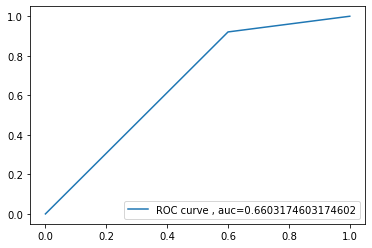

In [169]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

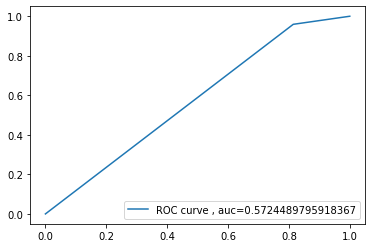

In [172]:
y_pred_train = logreg_result.predict(X_train_scaled)
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train,  y_pred_train)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()